In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#importing test and train data

train_df = pd.read_csv("/content/sign_mnist_train.csv")
test_df = pd.read_csv("/content/sign_mnist_test.csv")

In [ ]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


Explanation of data here:

- Test data = around 7000
- Train data = around 28k

- Labels represent letters: no cases for 9=J or 25=Z because of gesture motions so --> 24 unique labels

- 785 cols for 785 pixels, a single 28x28 pixel image with grayscale values between 0-255

- How many images: Corresponds to rows in dfs

In [ ]:
# checking how many letters are in our dfs

print(train_df['label'].nunique())
print(test_df['label'].nunique())

24
24


Does enough data exist to accurately train the model on the data? i.e. are there enough images of each letter to use the training data for our purposes?

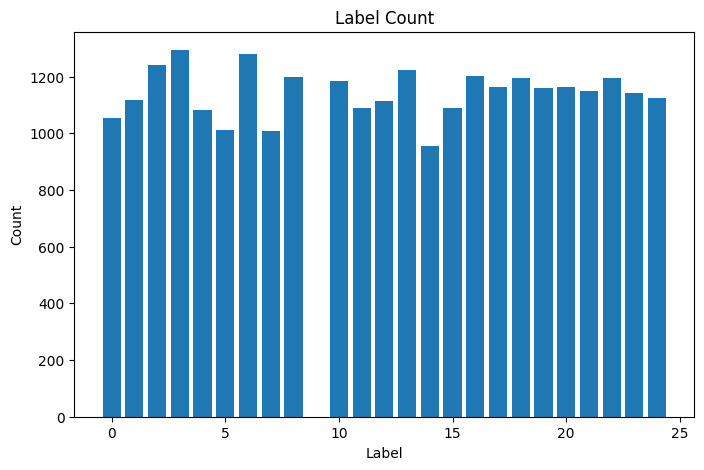

In [ ]:
# creating a label count graph for training dataset to answer above question

labels = train_df['label'].unique()
counts = train_df['label'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Count')
plt.show()


In [ ]:
# plt.figure(figsize = (10,10)) # Label Count
# sns.set_style("darkgrid")
# sns.countplot(train_df['label'])


 We have our data split into train and test, now we have to split it into X and Y for test and train.

Think: what is X? what is Y? why do we have to split them?

In [ ]:
# splitting train/test dfs into X and Y variables

y_train = train_df['label']
y_test = test_df['label']
train_df = train_df.drop(columns=['label'], axis = 1)
test_df = test_df.drop(columns=['label'], axis = 1)


In [ ]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [ ]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Converting the integer labels to binary form

The label dataframe consists of single values from 1 to 24 for each individual picture.

The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier.

Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0].

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

Our data's grey scale values run from 0-255. How can we make this range smaller so the CNN works faster? What will we normalize? X/Y? Test/Train?

In [ ]:
# normalize the data
x_train = x_train / 255
x_test = x_test / 255


CNN's require 3D input. As you can see from cell 38, our data is currently 1D. ChatGPT explains why pretty well:

In [ ]:
# reshape the data
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

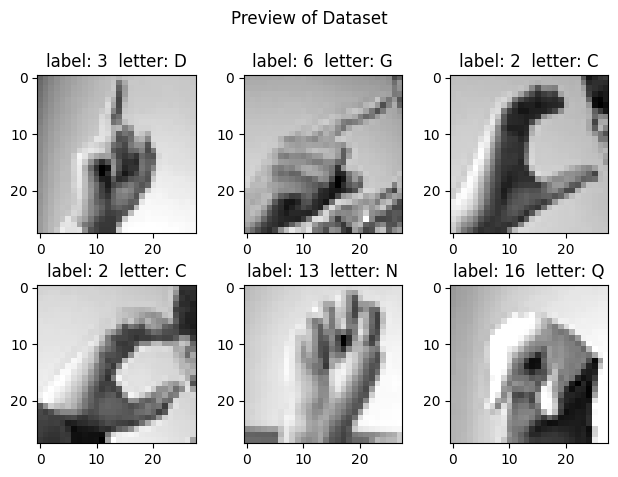

In [ ]:
# visualizing dataset
fig,axe=plt.subplots(2,3)
fig.suptitle('Preview of Dataset')
axe[0,0].imshow(x_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: D')
axe[0,1].imshow(x_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: G')
axe[0,2].imshow(x_train[2].reshape(28,28),cmap='gray')
axe[0,2].set_title('label: 2  letter: C')
axe[1,0].imshow(x_train[3].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: C')
axe[1,1].imshow(x_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: N')
axe[1,2].imshow(x_train[5].reshape(28,28),cmap='gray')
axe[1,2].set_title('label: 16  letter: Q')

plt.tight_layout(pad = 1.5)


Overfitting is an issue where the model is fit too specifically to the training data, making it harder to generalize and serve as an efficient model.

Aside from splitting into test/train, we can also limit the chance of overfitting by augmenting the dataset. This maens generating new data to expand our dataset artificially.

The function does this by altering training data with small transformations and tiny variations.

Some techniques include grayscales, horizontal or vertical flips, random crops, color jitters, translations, rotations, and more.

We are going to apply some transformations to our training data using ImageDataGenerator from keras.

Below: random rotation, zoom in/out, height or width scaling to images pixel by pixel.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 20,
                                  height_shift_range=0.1,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# remove rescale after filling data normalization cell

train_datagen.fit(x_train)

In [ ]:
# edward - the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(24, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    steps_per_epoch=len(x_train) / 32,
                    epochs = 20,
                    validation_data=(x_test, y_test))

Epoch 1/20
857/857 [==============================] - 32s 35ms/step - loss: 0.7069 - accuracy: 0.7942 - val_loss: 0.3470 - val_accuracy: 0.8843
Epoch 2/20
857/857 [==============================] - 34s 39ms/step - loss: 0.0216 - accuracy: 0.9980 - val_loss: 0.3099 - val_accuracy: 0.9134
Epoch 3/20
857/857 [==============================] - 26s 31ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.3160 - val_accuracy: 0.9268
Epoch 4/20
857/857 [==============================] - 26s 31ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.3772 - val_accuracy: 0.9060
Epoch 5/20
857/857 [==============================] - 27s 31ms/step - loss: 6.5772e-04 - accuracy: 1.0000 - val_loss: 0.4113 - val_accuracy: 0.9159
Epoch 6/20
857/857 [==============================] - 28s 32ms/step - loss: 2.4181e-04 - accuracy: 1.0000 - val_loss: 0.4103 - val_accuracy: 0.9148
Epoch 7/20
857/857 [==============================] - 27s 32ms/step - loss: 1.4179e-04 - accuracy: 1.0000 - val_loss: 0.4256 - v

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_acc)

225/225 [==============================] - 2s 8ms/step - loss: 0.6185 - accuracy: 0.9116
Test Accuracy:  0.911600649356842


ValueError: x and y must have same first dimension, but have shapes (5,) and (20,)

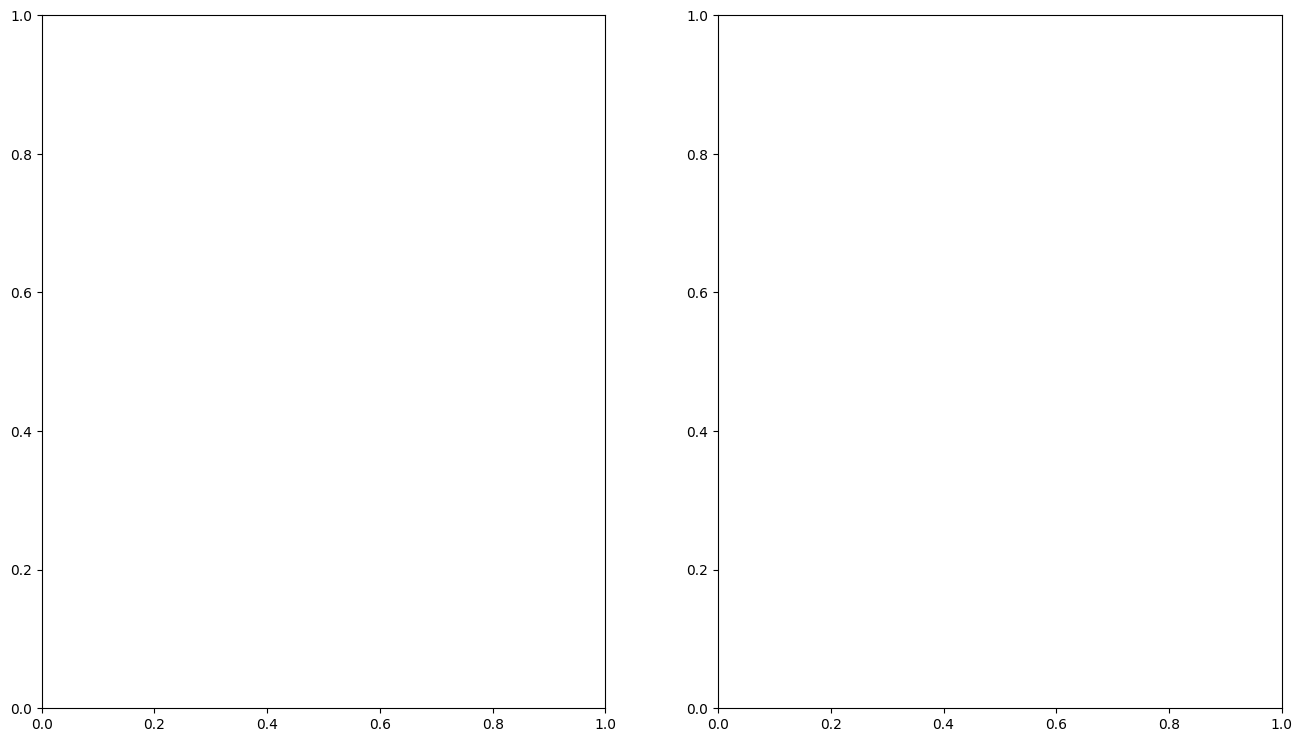

In [ ]:
epochs = [i for i in range(1, 6)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16, 9)

ax[0].plot(epochs, train_acc, 'bo-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'b-o', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize = (12, 12))
sns.heatmap(cm, cmap='Blues', linecolor='black', linewidth=1, annot=True, fmt='')

In [ ]:
# mukhil function to test diff validation splits

In [ ]:
# mukhil function to test diff validation splits

In [ ]:
# edward accuracy graph

In [ ]:
# skylar loss function visualization

In [ ]:
# rainie loss function visualization

In [ ]:
# derek confusion matrices

In [ ]:
# divik confusion matrices
model_prediction = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import string
model_predicted_labels = np.argmax(model_prediction, axis=1)
labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(labels, model_predicted_labels)
alphabet_labels = [char for char in string.ascii_uppercase if char not in ('J', 'Z')]


plt.figure(figsize = (12, 12))
sns.heatmap(cm, cmap='Reds', linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=alphabet_labels, yticklabels=alphabet_labels, )


In [ ]:
# divik model and graphs below